In [7]:
import numpy as np
import pandas as pd

train = pd.read_csv('train.csv', index_col='index')
test = pd.read_csv('test_x.csv', index_col='index')
submission = pd.read_csv('sample_submission.csv', index_col='index')

def resumetable(df):
    print(f'데이터셋 형상: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': '피처'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고윳값 개수'] = df.nunique().values
    summary['첫 번째 값'] = df.loc[0].values
    summary['두 번째 값'] = df.loc[1].values
    summary['세 번째 값'] = df.loc[2].values

    return summary

resumetable(train)

데이터셋 형상: (45532, 77)


,피처,데이터 타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값,세 번째 값
0,QaA,float64,0,5,3.0,5.0,4.0
1,QaE,int64,0,3235,363,647,1623
2,QbA,float64,0,5,4.0,5.0,1.0
3,QbE,int64,0,5835,1370,1313,1480
4,QcA,float64,0,5,5.0,3.0,1.0
...,...,...,...,...,...,...,...
72,wr_09,int64,0,2,0,0,1
73,wr_10,int64,0,2,1,1,1
74,wr_11,int64,0,2,0,0,0
75,wr_12,int64,0,2,1,1,1


In [10]:
all_data = pd.concat([train, test])
all_data = all_data.drop('voted', axis=1)
all_data

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
index,,,,,,,,,,,,,,,,,,,,,
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,...,0,1,0,1,1,0,1,0,1,1
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,...,1,1,0,1,1,0,1,0,1,1
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,...,1,1,0,1,1,1,1,0,1,1
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,...,0,0,0,0,1,0,1,0,1,1
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,...,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,5.0,427,5.0,1066,5.0,588,1.0,560,2.0,1110,...,1,1,0,1,1,0,1,0,1,1
11379,1.0,314,5.0,554,5.0,230,1.0,956,2.0,1173,...,1,1,1,1,1,1,1,1,1,1
11380,1.0,627,2.0,799,1.0,739,2.0,1123,1.0,829,...,1,1,0,1,1,0,1,0,1,1


In [27]:
# gender -> 숫자
all_data['gender'] = all_data['gender'].map({'male':0, 'female':1})

# race -> 숫자
# religion -> 숫자

In [28]:
num_train = len(train)
X_train = all_data[:num_train]
X_text = all_data[num_train:]
y = train['voted']
train

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
index,,,,,,,,,,,,,,,,,,,,,
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,...,0,1,0,1,1,0,1,0,1,1
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,...,1,1,0,1,1,0,1,0,1,1
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,...,1,1,0,1,1,1,1,0,1,1
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,...,0,0,0,0,1,0,1,0,1,1
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,...,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,2.0,1050,5.0,619,4.0,328,1.0,285,1.0,602,...,1,1,0,1,1,1,1,0,1,1
45528,2.0,581,3.0,1353,4.0,1164,1.0,798,3.0,1680,...,1,1,0,1,1,1,1,0,1,1
45529,4.0,593,1.0,857,1.0,1047,4.0,1515,5.0,1690,...,1,1,0,1,1,0,1,0,1,1


In [38]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='age_group', ylabel='Count'>

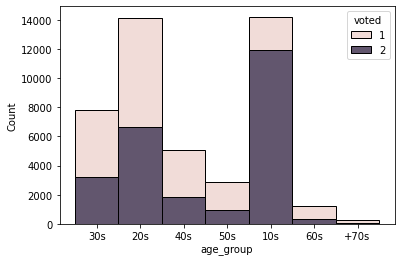

In [44]:
# 수치형 데이터 (연속형)
sns.histplot(data = train, x = 'age_group', hue = y, multiple='stack')
# sns.histplot(data = train, x = 'familysize', hue = y, multiple='stack')

<AxesSubplot:xlabel='urban', ylabel='count'>

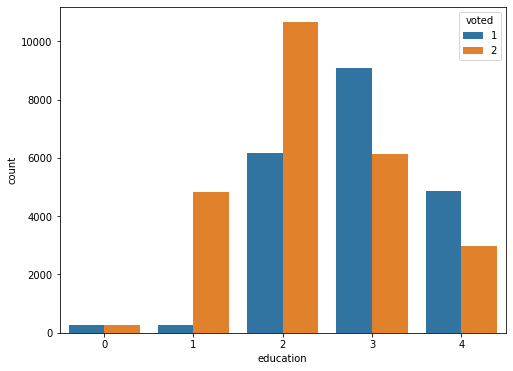

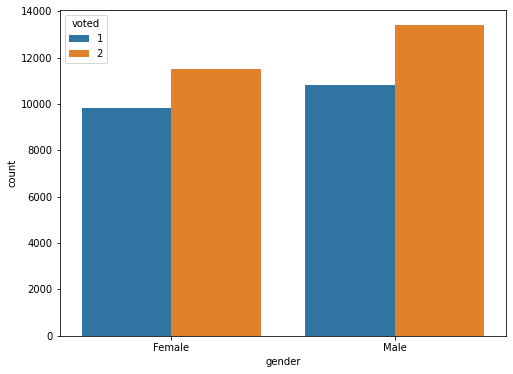

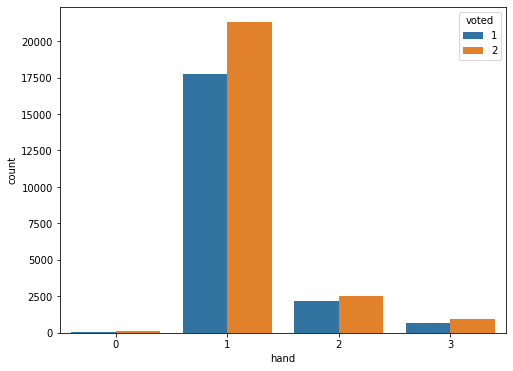

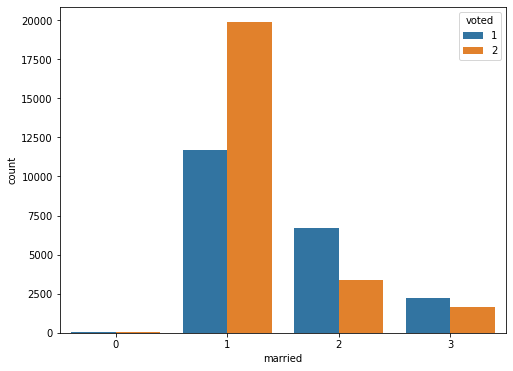

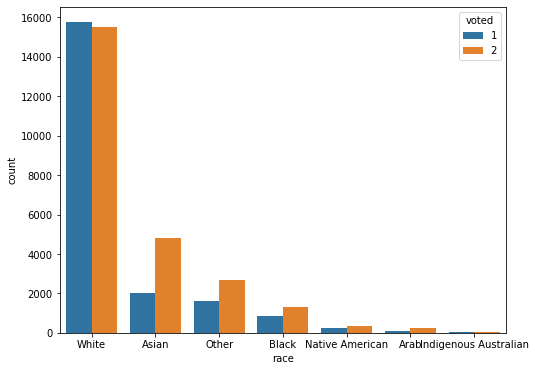

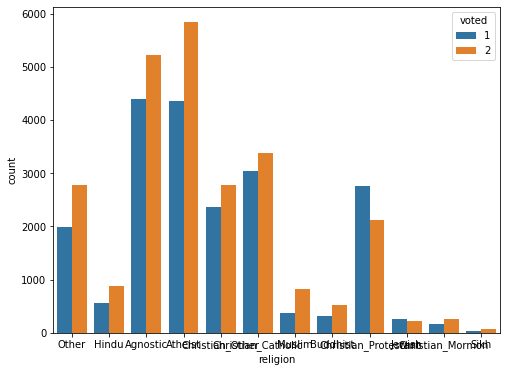

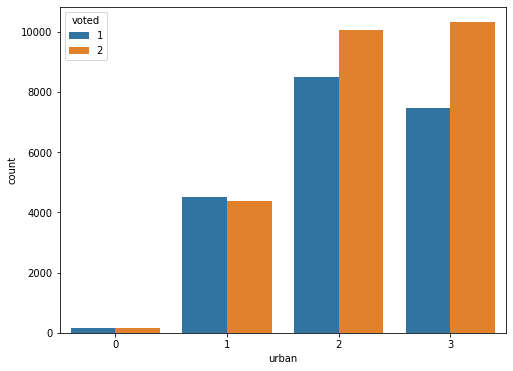

In [33]:
# 범주형 데이터 (순서형, 명목형)
plt.figure(figsize =(8,6))
sns.countplot(data = train, x = 'education', hue = y)

plt.figure(figsize =(8,6))
sns.countplot(data = train, x = 'gender', hue = y)

plt.figure(figsize =(8,6))
sns.countplot(data = train, x = 'hand', hue = y)

plt.figure(figsize =(8,6))
sns.countplot(data = train, x = 'married', hue = y)

plt.figure(figsize =(8,6))
sns.countplot(data = train, x = 'race', hue = y)

plt.figure(figsize =(8,6))
sns.countplot(data = train, x = 'religion', hue = y)

plt.figure(figsize =(8,6))
sns.countplot(data = train, x = 'urban', hue = y)